In [2]:
#Formação Cientista de Dados
#Projeto Final

In [3]:
# Importação das bibliotecas de análise exploratória
import pandas as pd
import numpy as np
import seaborn as srn
import statistics  as sts

In [4]:
#importar dados
dataset = pd.read_csv('Banco de dados.csv', sep=";")
#visulizar
dataset.head()

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951,2,3.0,2,1,3,2.0,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096,2,4.0,2,4,3,3.0,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882,2,4.0,2,4,4,4.0,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870,2,3.0,3,4,3,4.0,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,9055,1,3.0,2,4,3,4.0,35,3,2.0,1,3,2,1,0,1


In [5]:
# Verificar quantas linhas e colunas existem na base de dados, 1000 linhas e 20 colunas
dataset.shape

(1000, 20)

In [6]:
dataset['Valor'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Valor, dtype: float64

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Valor')

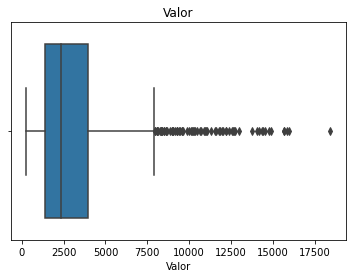

In [7]:
srn.boxplot(dataset['Valor']).set_title('Valor')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Valor')

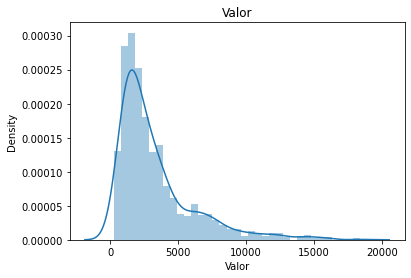

In [8]:
srn.distplot(dataset['Valor']).set_title('Valor')

In [9]:
dataset['Idade'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Idade, dtype: float64

In [10]:
#contamos valores NAN
#emprego e #habitacao
dataset.isnull().sum()

IDCREDITO                0
Duracao                  0
HistoricoCredito         0
Proposito                0
Valor                    0
Investimentos            0
Emprego                 10
TempoParcelamento        0
EstadoCivil              0
FiadorTerceiros          0
ResidenciaDesde          7
Idade                    0
OutrosFinanciamentos     0
Habitacao                9
EmprestimoExistente      0
Profissao                0
Dependentes              0
SocioEmpresa             0
Estrangeiro              0
Status                   0
dtype: int64

In [11]:
#Começando a tratar os dados
#Emprego
#remover nas e substiutir pela moda
dataset['Emprego'].describe()

count    990.000000
mean       2.704040
std        1.130639
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: Emprego, dtype: float64

In [12]:
#emprego, falta de padronização e NAs
agrupado = dataset.groupby(['Emprego']).size()
agrupado

Emprego
1.0    171
2.0    247
3.0    338
4.0    172
5.0     62
dtype: int64

In [13]:
#preenche NAs com 3 (moda) - utilizando a moda pq sei que é uma variável categórica
dataset['Emprego'].fillna('3', inplace=True)

In [14]:
#verificamos novamente NANs
dataset['Emprego'].isnull().sum()

0

In [15]:
#residencia, falta de padronização e NAs
agrupado2 = dataset.groupby(['ResidenciaDesde']).size()
agrupado2

ResidenciaDesde
1.0    129
2.0    308
3.0    147
4.0    409
dtype: int64

In [16]:
#preenche NAs com 4 (moda) - utilizando a moda pq sei que é uma variável categórica
dataset['ResidenciaDesde'].fillna('4', inplace=True)

In [17]:
#verificamos novamente NANs
dataset['ResidenciaDesde'].isnull().sum()

0

In [18]:
#dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['IDCREDITO'],keep=False)]

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status


In [19]:
#outliers em valor, vamos considerar 3 desvios padrão
desv = sts.stdev(dataset['Valor'])
desv

2822.7368759604406

In [20]:
#definir padrão como maior que 3 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Valor'] >=  3 * desv ] 

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
4,6,36,2,2,9055,1,3,2,4,3,4,35,3,2.0,1,3,2,1,0,1
13,19,24,2,5,12579,2,2,4,1,3,2,44,3,2.0,1,1,1,1,0,0
49,58,36,1,1,9566,2,3,2,1,3,2,31,2,1.0,2,4,1,0,0,1
55,64,48,4,6,14421,2,3,2,4,3,2,25,3,1.0,1,4,1,1,0,0
73,79,54,4,5,9436,1,3,2,4,3,2,39,3,1.0,1,3,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,928,48,2,5,10297,2,4,4,4,3,4,39,2,2.0,3,4,2,1,0,0
931,954,36,2,3,10974,2,5,4,1,3,2,26,3,1.0,2,1,1,1,0,0
986,896,36,3,5,8947,1,3,3,4,3,2,31,2,1.0,1,1,2,1,0,1
989,396,39,3,2,11760,5,4,2,4,3,3,32,3,NaN,1,4,1,1,0,1


In [21]:
#vamos atualizar Valor para mediana, calculamos
mediana = sts.median(dataset['Valor'])
mediana

2319.5

In [22]:
#atribumos
dataset.loc[dataset['Valor'] >=  3 * desv, 'Valor'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['Valor'] >=  3 * desv ] 

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status


In [23]:
dataset.head()

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951.0,2,3,2,1,3,2,22,3,1.0,1,4,1,0,0,0
1,3,12,1,2,2096.0,2,4,2,4,3,3,49,3,1.0,1,3,2,0,0,1
2,4,42,2,3,7882.0,2,4,2,4,4,4,45,3,2.0,1,4,2,0,0,1
3,5,24,3,4,4870.0,2,3,3,4,3,4,53,3,2.0,2,4,2,0,0,0
4,6,36,2,2,2319.5,1,3,2,4,3,4,35,3,2.0,1,3,2,1,0,1


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Valor')

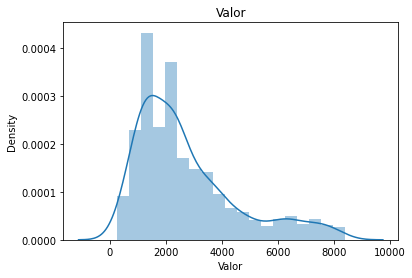

In [24]:
srn.distplot(dataset['Valor']).set_title('Valor')

In [25]:
#profissao, falta de padronização e NAs
agrupado3 = dataset.groupby(['Profissao']).size()
agrupado3

Profissao
1      147
2       22
3      197
4      625
999      9
dtype: int64

In [26]:
#atribuomos 4 (moda)
dataset.loc[dataset['Profissao'].isin( ['999']), 'Profissao'] = 4
agrupado3 = dataset.groupby(['Profissao']).size()
agrupado3

Profissao
1    147
2     22
3    197
4    634
dtype: int64

In [27]:
#Habitacao, falta de padronização e NAs
agrupado4 = dataset.groupby(['Habitacao']).size()
agrupado4

Habitacao
1.0    709
2.0    107
3.0    175
dtype: int64

In [28]:
#preenche NAs com 4 (moda) - utilizando a moda pq sei que é uma variável categórica
dataset['Habitacao'].fillna(1.0, inplace=True)

In [29]:
#verificamos novamente NANs
dataset['Habitacao'].isnull().sum()

0

In [30]:
# Importação das bibliotecas para machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [31]:
#Transformando a coluna Status em variável categórica
dataset.loc[dataset['Status'].isin( [0]), 'Status'] = "Nao"
dataset.loc[dataset['Status'].isin( [1]), 'Status'] = "Sim"
agrupado5 = dataset.groupby(['Status']).size()
agrupado5

Status
Nao    300
Sim    700
dtype: int64

In [32]:
previsores = dataset.iloc[:,0:19].values
classe = dataset.iloc[:,19].values

In [33]:
dataset.head()

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951.0,2,3,2,1,3,2,22,3,1.0,1,4,1,0,0,Nao
1,3,12,1,2,2096.0,2,4,2,4,3,3,49,3,1.0,1,3,2,0,0,Sim
2,4,42,2,3,7882.0,2,4,2,4,4,4,45,3,2.0,1,4,2,0,0,Sim
3,5,24,3,4,4870.0,2,3,3,4,3,4,53,3,2.0,2,4,2,0,0,Nao
4,6,36,2,2,2319.5,1,3,2,4,3,4,35,3,2.0,1,3,2,1,0,Sim


In [34]:
# Divisão da base de dados entre treinamento e teste (30% para testar e 70% para treinar)
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [35]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta = RandomForestClassifier(n_estimators = 100)
floresta.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [36]:
# Visualização dos atributos principais
floresta.estimators_
#floresta.estimators_[1]

[DecisionTreeClassifier(max_features='auto', random_state=291908103),
 DecisionTreeClassifier(max_features='auto', random_state=1483852700),
 DecisionTreeClassifier(max_features='auto', random_state=368313012),
 DecisionTreeClassifier(max_features='auto', random_state=264383972),
 DecisionTreeClassifier(max_features='auto', random_state=965773918),
 DecisionTreeClassifier(max_features='auto', random_state=81250325),
 DecisionTreeClassifier(max_features='auto', random_state=1327247345),
 DecisionTreeClassifier(max_features='auto', random_state=1467030122),
 DecisionTreeClassifier(max_features='auto', random_state=1944880318),
 DecisionTreeClassifier(max_features='auto', random_state=1063180459),
 DecisionTreeClassifier(max_features='auto', random_state=1922626713),
 DecisionTreeClassifier(max_features='auto', random_state=219672019),
 DecisionTreeClassifier(max_features='auto', random_state=606336165),
 DecisionTreeClassifier(max_features='auto', random_state=1100920838),
 DecisionTreeC

In [37]:
previsoes = floresta.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes)
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.8

In [38]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from lazypredict.Supervised import LazyRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [39]:
#Transformando a coluna Status em variável categórica
dataset.loc[dataset['Status'].isin( ["Nao"]), 'Status'] = 0
dataset.loc[dataset['Status'].isin( ["Sim"]), 'Status'] = 1
agrupado6 = dataset.groupby(['Status']).size()
agrupado6

Status
0    300
1    700
dtype: int64

In [40]:
dataset.head()

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2,48,2,1,5951.00,2,3.00,2,1,3,2.00,22,3,1.00,1,4,1,0,0,0
1,3,12,1,2,2096.00,2,4.00,2,4,3,3.00,49,3,1.00,1,3,2,0,0,1
2,4,42,2,3,7882.00,2,4.00,2,4,4,4.00,45,3,2.00,1,4,2,0,0,1
3,5,24,3,4,4870.00,2,3.00,3,4,3,4.00,53,3,2.00,2,4,2,0,0,0
4,6,36,2,2,2319.50,1,3.00,2,4,3,4.00,35,3,2.00,1,3,2,1,0,1


In [41]:
#exportando para csv novamente
dataset.to_csv ("Banco de Dados 2.csv", index = False)

In [61]:
dataset = dataset.astype('float')
dataset

,IDCREDITO,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,FiadorTerceiros,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Status
0,2.00,48.00,2.00,1.00,5951.00,2.00,3.00,2.00,1.00,3.00,2.00,22.00,3.00,1.00,1.00,4.00,1.00,0.00,0.00,0.00
1,3.00,12.00,1.00,2.00,2096.00,2.00,4.00,2.00,4.00,3.00,3.00,49.00,3.00,1.00,1.00,3.00,2.00,0.00,0.00,1.00
2,4.00,42.00,2.00,3.00,7882.00,2.00,4.00,2.00,4.00,4.00,4.00,45.00,3.00,2.00,1.00,4.00,2.00,0.00,0.00,1.00
3,5.00,24.00,3.00,4.00,4870.00,2.00,3.00,3.00,4.00,3.00,4.00,53.00,3.00,2.00,2.00,4.00,2.00,0.00,0.00,0.00
4,6.00,36.00,2.00,2.00,2319.50,1.00,3.00,2.00,4.00,3.00,4.00,35.00,3.00,2.00,1.00,3.00,2.00,1.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,505.00,24.00,2.00,4.00,1207.00,2.00,1.00,4.00,1.00,3.00,4.00,24.00,3.00,3.00,1.00,4.00,1.00,0.00,0.00,0.00
996,834.00,24.00,2.00,1.00,5084.00,1.00,2.00,2.00,1.00,3.00,4.00,42.00,3.00,1.00,1.00,4.00,1.00,1.00,0.00,1.00
997,234.00,18.00,0.00,1.00,866.00,2.00,3.00,4.00,3.00,4.00,2.00,25.00,3.00,1.00,1.00,3.00,1.00,0.00,0.00,1.00
998,474.00,6.00,0.00,10.00,1238.00,1.00,5.00,4.00,4.00,3.00,4.00,36.00,3.00,1.00,1.00,1.00,2.00,1.00,0.00,1.00


In [62]:
X = dataset.iloc[:,:-1] # Using all column except for the last column as X
Y = dataset.iloc[:,-1] # Selecting the last column as Y

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.3,random_state = 42)
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None)
models_train,predictions_train = reg.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = reg.fit(X_train, X_test, Y_train, Y_test)

 21%|██        | 9/43 [00:01<00:06,  5.15it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 77%|███████▋  | 33/43 [00:06<00:01,  5.62it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:08<00:01,  4.51it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


  2%|▏         | 1/43 [00:00<00:04,  9.66it/s]

LGBMRegressor model failed to execute
Check failed: (best_split_info.right_count) > (0) at D:\a\1\s\python-package\compile\src\treelearner\serial_tree_learner.cpp, line 661 .



 26%|██▌       | 11/43 [00:01<00:04,  6.86it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 77%|███████▋  | 33/43 [00:07<00:01,  5.22it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 88%|████████▊ | 38/43 [00:08<00:01,  4.80it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:09<00:00,  4.71it/s]


In [71]:
models_train

,R-Squared,RMSE,Time Taken
Model,,,
DecisionTreeRegressor,1.00,0.00,0.04
ExtraTreeRegressor,1.00,0.00,0.05
ExtraTreesRegressor,1.00,0.00,0.76
GaussianProcessRegressor,1.00,0.00,0.20
XGBRegressor,1.00,0.01,0.37
HistGradientBoostingRegressor,0.89,0.15,1.43
RandomForestRegressor,0.88,0.16,1.05
BaggingRegressor,0.84,0.18,0.13
MLPRegressor,0.82,0.20,2.05


In [72]:
models_test

,R-Squared,RMSE,Time Taken
Model,,,
HistGradientBoostingRegressor,0.12,0.43,1.82
LGBMRegressor,0.12,0.43,0.23
GradientBoostingRegressor,0.11,0.43,0.39
ElasticNetCV,0.11,0.43,0.18
LassoLarsCV,0.11,0.43,0.10
LarsCV,0.11,0.43,0.12
LassoCV,0.11,0.43,0.20
LassoLarsIC,0.11,0.43,0.03
BayesianRidge,0.11,0.43,0.05


In [73]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 90%|█████████ | 27/30 [00:04<00:00,  7.89it/s]

[13:25:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 93%|█████████▎| 28/30 [00:04<00:00,  8.43it/s]

[13:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 30/30 [00:05<00:00,  5.83it/s]


In [74]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,1.00,1.00,1.00,1.00,0.34
LabelPropagation,1.00,1.00,1.00,1.00,0.17
RandomForestClassifier,1.00,1.00,1.00,1.00,0.68
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.03
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.04
ExtraTreesClassifier,1.00,1.00,1.00,1.00,0.55
LabelSpreading,1.00,1.00,1.00,1.00,0.20
BaggingClassifier,0.99,0.99,0.99,0.99,0.14
NuSVC,0.92,0.87,0.87,0.92,0.14


In [75]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.67,0.67,0.67,0.68,0.05
LGBMClassifier,0.74,0.66,0.66,0.73,0.30
GaussianNB,0.66,0.66,0.66,0.67,0.07
SGDClassifier,0.70,0.63,0.63,0.70,0.04
XGBClassifier,0.72,0.63,0.63,0.70,0.43
AdaBoostClassifier,0.72,0.63,0.63,0.70,0.35
LinearDiscriminantAnalysis,0.74,0.62,0.62,0.71,0.06
RandomForestClassifier,0.74,0.62,0.62,0.71,0.68
DecisionTreeClassifier,0.65,0.61,0.61,0.66,0.05
